<center>

# Entrega número 1
# Exploración y clasificación sobre la base de datos del Titanic
## (Entregar en la semana de septiembre)

In [58]:
#Agreguen los imports que vayan a utilizar en este encabezado.
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Métodos de aprendizaje automático
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


## Base de datos [Titanic](https://www.kaggle.com/c/titanic/data)

En este práctico trabajaremos sobre la base de datos de los sobrevivientes del accidente del Titanic. Esta base de datos es abierta y encontrarán mucho trabajo ya hecho sobre la misma en internet. 

Los objetivos de este trabajo práctico son:

- Familiarizarse con la manipulación de datos utilizando el paquete `Pandas`.

- Familiarizarse con las herramientas gráficas en python, en particular `matplotlib` y `seaborn`.

- Aprender a plantear un modelo de aprendizaje automático en python utilizando el paquete `scikit-learn` y `xgboost`. En particular, plantearán modelos de clasificación basados en árboles de decisión para predecir la supervivencia de un pasajero del titanic en función de las variables independientes del conjunto de datos.


La base de datos que utilizarán cuenta con 9 variables independientes y una variable respuesta. Las variables son:

- *survival* : 0 si no sobrevivió, 1 si sobrevivió (variable respuesta).

- *pclass*: clase del ticket. 1 = primera clase, 2 = segunda clase, 3 = tercera clase.

- *sex*: Sexo del pasajero. Male = Masculino, Female = Femenino.

- *Age*: Edad en años del pasajero. 

- *sibsp*: Número de familiares (hermanos, pareja) en el Titanic

- *parch*: Número de padres o hijos en el Titanic.

- *ticket*: Número de ticket.

- *fare*: El costo del pasaje.

- *cabin*: El número de cabina.

- *Embarked*: Puerto donde embarcó. C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
train_data = pd.read_csv('1 entrega/train.csv')
test_data = pd.read_csv('1 entrega/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## 1.) Realizar análisis exploratorio básico

a.) Utilizando el método [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) y el método [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) de los pandas dataframes, obtener la edad media de cada sexo. Realizar un gráfico de barras que muestre la edad media según el sexo.

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.groupby(['Sex'])['Age'].mean()

Sex
female    27.92
male      30.73
Name: Age, dtype: float64

b.) Usando el método [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) del paquete seaborn, realizar un gráfico de barra de la supervivencia en función del sexo. Además, realice un gráfico de barra de la supervivencia en función de la clase del ticket (variable `pclass`). 

Opcional: Poner ambos gráficos uno al lado del otro, utilizando el método [`plt.subplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)del módulo pyplot de matplotlib. 

[Text(0, 0, 'No'), Text(1, 0, 'Si')]

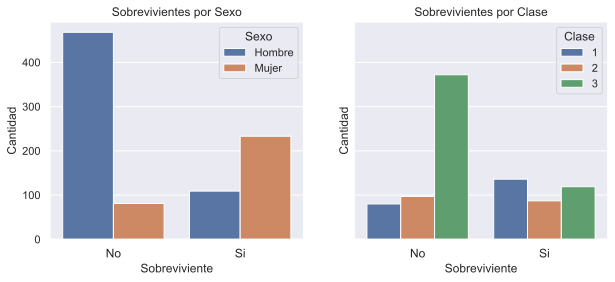

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) # Para poner un grafico al lado del otro

a= sns.countplot(x='Survived', hue='Sex', data=train_data, ax=axes[0]); # grafico 1 
a.set(xlabel='Sobreviviente', ylabel='Cantidad',title= "Sobrevivientes por Sexo")
a.set_xticklabels(["No","Si"], fontsize=12)

a.legend(title='Sexo', loc='upper right', labels=['Hombre', 'Mujer'])
b= sns.countplot(x='Survived', hue='Pclass', data=train_data, ax=axes[1]); # grafico 2
b.set(xlabel='Sobreviviente', ylabel='Cantidad',title= "Sobrevivientes por Clase")
b.legend(title='Clase', loc='upper right')
b.set_xticklabels(["No","Si"], fontsize=12)
# Hue es el criterio de clasificacion.


c.) Realice dos gráficos de torta, uno contemplando sólo los datos de los pasajeros que murieron y otro sólo los datos de los que sobrevivieron, en donde se vea en cada porción la cantidad de padres o hijos (variable `Parch`) de cada subconjunto de datos. Si puede, incluyalo dentro de una misma figura.

Para agrupar los datos según la supervivencia, recordar de usar `groupby()` de pandas. Los gráficos de torta se pueden hacer con `plt.pie()` de matplotlib o con cualquier otro paquete que desee. Para contar cuántos casos hay de cada valor de una variable, recordar usar el método `value_counts()` de los pandas dataframe. 

Si este inciso resulta muy complejo, no preocuparse. Lo discutimos la clase que viene.

opcional: hacer lo mismo con la variable `SibSp` en vez de `Parch`.

In [39]:
train_data.columns
train_data.groupby(['Survived'])['Parch'].count()
#train_data[train_data['Survived'] == 1].mean(numeric_only=True)

#tabla[tabla['Survived']==1]
#print(tabla)
#tabla[tabla['Survived']==1]
sur0=train_data[train_data['Survived']==0]
sur1=train_data[train_data['Survived']==1]


pd.crosstab(sur1['Survived'], train_data['Parch']).values
pd.crosstab(sur0['Survived'], train_data['Parch']).values

#train_data['Parch'].value_counts().index
#pd.crosstab(sur0['Survived'], train_data['Parch']).values


array([[445,  53,  40,   2,   4,   4,   1]], dtype=int64)

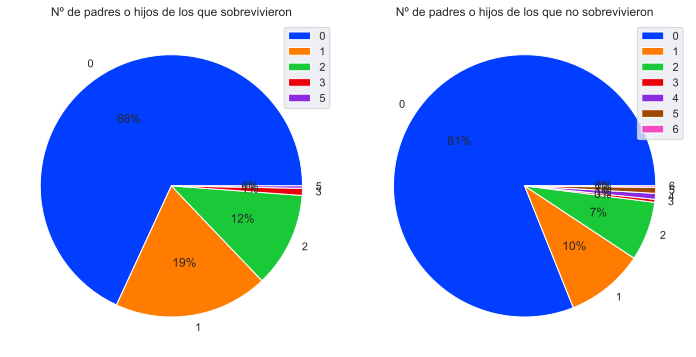

In [28]:
# Para los sobrevivientes = 1
table1 = pd.crosstab(sur1['Survived'], train_data['Parch'])
data, labels = list(table1.values[0]), list(table1.columns)

# Para los no sobrevivientes = 0
table2 = pd.crosstab(sur0['Survived'], train_data['Parch'])
data2, labels2 = list(table2.values[0]), list(table2.columns)

colors = sns.color_palette('bright')[0:7]
colors2 = sns.color_palette('bright')[0:7]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Nº de padres o hijos de los que sobrevivieron')
plt.legend()
plt.subplot(122)
plt.pie(data2, labels = labels2, colors = colors2, autopct='%.0f%%')
plt.title('Nº de padres o hijos de los que no sobrevivieron')
plt.legend()
plt.tight_layout()
plt.show()

## 2.) Entrenar Random Forest
Con un análisis exploratorio rápido como el que hicimos, vemos que parece haber relación entre las variables *Sex*, *Pclass*, *SibSp*, *Parch* y la variable respuesta. Por lo tanto, utilizaremos sólo estas para entrenar nuestro modelo de clasificación (Se debería hacer un análisis exhaustivo de cada variable, ver datos faltantes, modificar niveles de factores de ser necesario, generar variables dummies, etc. Para simplificar el problema, sólo utilizaremos estas cuatro variables propuestas).

a.) Utilzando `RandomForestClassifier` de `sklearn.ensemble`, entrenar un modelo Random Forest con el conjunto de datos de entrenamiento `train_data`.


In [45]:
# Converti los datos con esta funcion porque me saltaba un error en el random forest con la variable sexo.
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    data['Sex'] = number.fit_transform(data.Sex)
    return data

train=convert(train_data)
test=convert(test_data)

In [46]:
from sklearn.ensemble import RandomForestClassifier

X_train=train[['Sex', 'Pclass', 'SibSp', 'Parch']]  # Features
y_train=train['Survived']  # Labels

X_test=test[['Sex', 'Pclass', 'SibSp', 'Parch']]  # Features
#y_test=test_data['Survived']  # Labels

#Creamos un clasificador tipo Random forest de scikit-learn
clf=RandomForestClassifier(n_estimators=100)
#Entrenamos al modelo con los datos de entrenamiento y luego predecimos con el testeo.
clf.fit(X_train,y_train)

RandomForestClassifier()


b.) Evaluar la capacidad predictiva del modelo utilizando el conjunto de datos de entrenamiento `train_data` (ya que el de prueba no cuenta con la variable respuesta. Lo correcto es evaluar en la base de datos de prueba y hacer validación cruzada. De nuevo, estamos simplificando. Ya vamos a entrar de lleno con la metodología). Recuerde que para evaluar la capacidad predictiva, usamos el método `accuracy_score` del módulo `metrics` de `sklearn` (ver *E3-AA2021-arboles.ipynb*).


In [47]:
from sklearn import metrics
# Cuan frecuente es correcta la clasificación?
y_pred=clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.8170594837261503



c.) Predecir la supervivencia en los datos de prueba (`test_data`). Guardar estos resultados para comparar con en siguiente inciso.


In [48]:
y_pred=clf.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]



d.) Analizar el peso de las variables utilizadas en el modelo entrenado (método `feature_importances_` del modelo entrenado). Interpretar este resultado.

In [53]:
index=['Sex', 'Pclass', 'SibSp', 'Parch']
feature_imp = pd.Series(clf.feature_importances_,index=index).sort_values(ascending=True)
feature_imp
# La variable de mayor importancia para predecir la supervivencia en el dataset del titanic es Sex.


SibSp     0.10
Parch     0.10
Pclass    0.22
Sex       0.57
dtype: float64

[Text(0, 0, 'SibSp'),
 Text(0, 1, 'Parch'),
 Text(0, 2, 'Clase'),
 Text(0, 3, 'Sexo')]

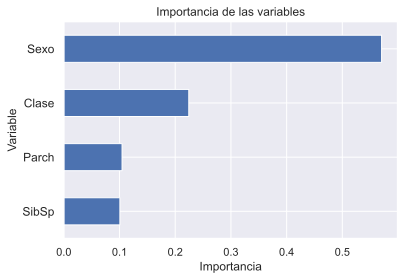

In [57]:
a = feature_imp.plot(kind='barh')
a.set(xlabel='Importancia', ylabel='Variable',title= "Importancia de las variables")
a.set_yticklabels(["SibSp","Parch","Clase","Sexo"], fontsize=12)

Cabe destacar que la variable de mayor importancia en la clasificacion de pasajeros sobrevivientes es sexo, seguida por la clase, parch y sibsp. Por el grafico anterior podemos mencionar que sobrevivieron mas mujeres que hombres.

## 3.) Entrenar XGBoost

Repita el ejercicio 2.) pero utilizando el método Extreme Gradient Boosting en vez de Random Forest. Compare la *accuracy* o exactitud de ambos métodos. Para este inciso, referirse a la última sección de *E3-AA2021_arboles.ipynb*.

Compare las predicciones en el conjunto de prueba del modelo XGBoost con las predcciones del mismo conjunto del modelo RandomForest. ¿Son iguales? Puede realizar matrices de confusión para los datos de entrenamiento que tienen etiqueta.

Analice e interprete brevemente los resultados obtenidos como le parezca adecuado.

In [ ]:
import numpy as np
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
# Separamos los datos
X_train=train[['Sex', 'Pclass', 'SibSp', 'Parch']]  # Features
y_train=train['Survived']  # Labels

X_test=test[['Sex', 'Pclass', 'SibSp', 'Parch']]  # Features

model2 = XGBRFClassifier(eval_metric='error',
                         n_estimators=100,
                        use_label_encoder=False,
                        eta=0.1,
                        subsample=0.8,
                        random_state=1)

model1 = XGBClassifier(eval_metric='error',
                       n_estimators=100,
                      use_label_encoder=False,
                      eta=0.01,
                      subsample=0.8,
                      random_state=1)

#Entrenamos al modelo con los datos de entrenamiento y luego predecimos con el testeo.
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predicciones
y_pred1 = model1.predict(X_train)
y_pred2 = model2.predict(X_train)
y_pred = clf.predict(X_train)

#Calculamos la precisión
accuracy1 = accuracy_score(y_train, y_pred1)
accuracy2 = accuracy_score(y_train, y_pred2)
accuracy3 = accuracy_score(y_train, y_pred)

# Comparamos metricas:
print("Accuracy RF: %.2f%%" % (accuracy3 * 100.0))
print("Accuracy XGBoost: %.2f%%" % (accuracy1 * 100.0))
print("Accuracy XGBoost: %.2f%%" % (accuracy2 * 100.0))

# El de mayor accuracy es el Random Forest

Accuracy RF: 81.71%
Accuracy XGBoost: 81.03%
Accuracy XGBoost: 81.14%


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


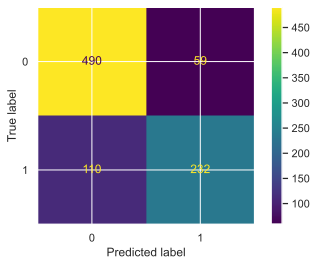

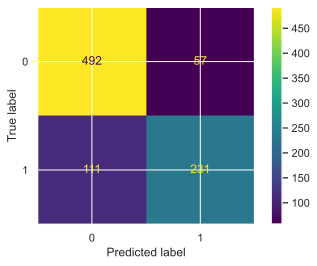

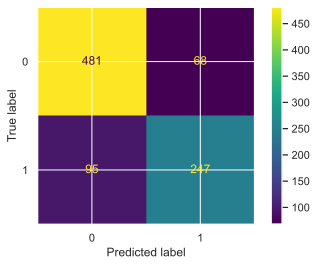

In [74]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Para modelo 1
cm = confusion_matrix(y_train, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Para modelo 2
cm = confusion_matrix(y_train, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Para modelo 3
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


El modelo que mejor predice los sobrevivientes es el random forest.
El modelo que mejor predice los no sobrevivientes es el XGB 2.

**Spoiler alert:** Sin tunear los parámetros de cada modelo (es decir, dejando los defaults), se espera que las accuracies sean similares. Tuneando los hiperparámetros se puede lograr hasta una diferencia de entre un 2% y 8% a favor de XGBoost. No es necesario ponerse a probar parámetros, con los defaults es suficiente. Sin embargo, si lo quieren hacer, prueben y dejen sus comentarios.

## **Feedback (Opcional):** Pueden dejar comentarios acerca de lo que les parece este práctico para modificarlo a futuro (si les parece muy difícil, muy fácil, aburrido, entretenido, no saben ni por donde empezar, les lleva mucho tiempo, etc.). Todo comentario es bienvenido y no forma parte de la evaluación.